### Workshop - 1: K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [3]:
x=df.drop(labels=['Id','Species'],axis=1)


In [4]:
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


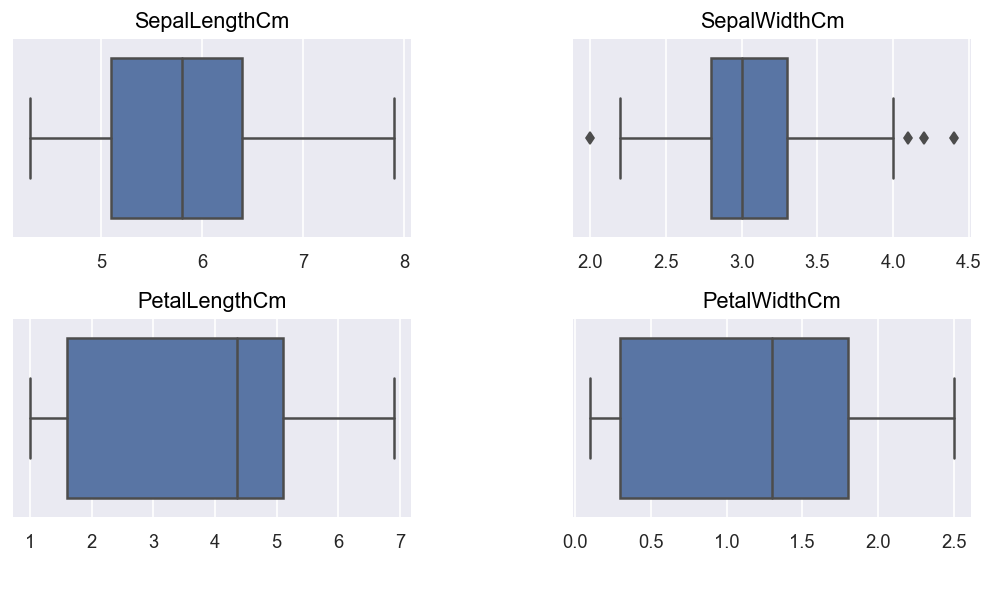

In [5]:
# make a Loop to plot the data to understand the central tendency by using boxplot

plt.figure(figsize=(10,5), dpi = 120)
sns.set()
for i in range(len(x.columns)):
    plt.subplot(2,2,i+1)
    plt.title(x.columns[i], color = 'black', fontsize = '13')
    sns.boxplot(data = x , x = x.columns[i])
    plt.xlabel(" ")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [6]:
#removing outliers from SpelLengthCm column
q_low = x["SepalLengthCm"].quantile(0.15)
q_hi  = x["SepalLengthCm"].quantile(0.80)

x = x[(x["SepalLengthCm"] < q_hi) & (x["SepalLengthCm"] > q_low)]

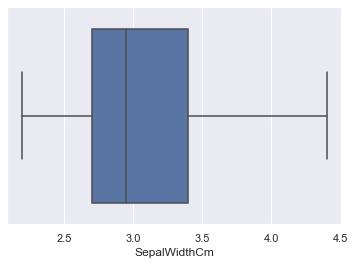

In [7]:
sns.boxplot(data = x , x = x.columns[1]);


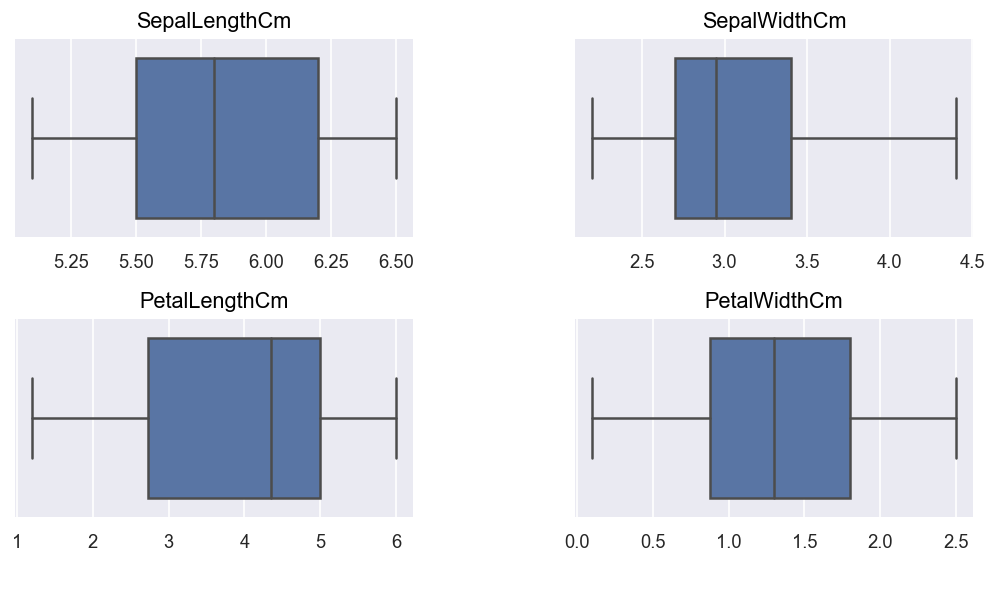

In [8]:
plt.figure(figsize=(10,5), dpi = 120)
sns.set()
for i in range(len(x.columns)):
    plt.subplot(2,2,i+1)
    plt.title(x.columns[i], color = 'black', fontsize = '13')
    sns.boxplot(data = x , x = x.columns[i])
    plt.xlabel(" ")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [15]:
x=df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

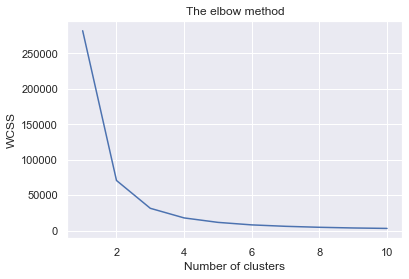

In [16]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [17]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, 
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

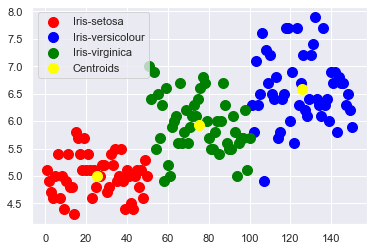

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()